In [1]:
import argparse
import numpy as np
import torch
import scipy.io as sio
from torch import sum
from torch.nn import Module
from typing import Any
from torch.autograd import Function
from torch.autograd.functional import jacobian, hessian
import MDS.MdsConfig as MdsConfig
from MDS.TorchMDS import TorchMDS
from Shape.NumpyShape import NumpyShape
from Shape.Shape import Shape
from MDS.NumpyMDS import NumpyMDS

parser = argparse.ArgumentParser(description='MDS args')
parser.add_argument('--p', default=[100, 200], help='p is the number of frequencies or '
                                                    'basis vectors')
parser.add_argument('--q', default=[200, 400], help='q is the number of samples')
parser.add_argument('--max_iter', default=500)
parser.add_argument('--a_tol', default=0.001, help="absolute tolerance")
parser.add_argument('--r_tol', default=0.00001, help="relative tolerance")
parser.add_argument('--filename', default='input/dog0.off', help="file name")
parser.add_argument('--d_mat_input', default='input/D_dog0.mat',
                    help='geodesic distance mat')
parser.add_argument('--c', default=2, help="c = q/p, i.e. Nyquist ratio")
parser.add_argument('--plot_flag', default=True)
parser.add_argument('--compute_full_stress_flag', default=True)
parser.add_argument('--display_every', default=10, help='display every n iterations')
parser.add_argument('--max_size_for_pinv', default=1000,
                    help='display every n iterations')

_args = parser.parse_args(args=[])

C:\Users\adiw\PycharmProjects\SLS-MDS\Shape\Shape.py:140: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


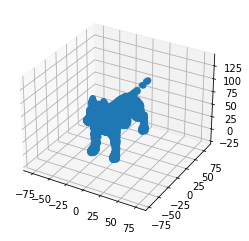

In [2]:
shape = NumpyShape(_args.filename)
shape.mesh.show()
shape.plot_embedding(shape.mesh.vertices)
d_mat_input = sio.loadmat(_args.d_mat_input)['D']

In [3]:
mds_params = MdsConfig.MdsParams(shape, _args)
mds_params.set_shape(shape)
mds_params.set_p_q(_args.p, _args.q)
mds_params.set_weights(np.ones(d_mat_input.shape))


In [4]:
[samples, d_mat] = shape.sample_mesh_fps(np.max(mds_params.q), d_mat_input)
mds_params.set_samples(samples)

sample_mesh



In [5]:
# create subspace
shape.compute_subspace(max(mds_params.p))
mds = NumpyMDS(mds_params)
phi = np.real(shape.evecs)
x0 = shape.mesh.vertices

start compute subspace


2022-07-21 11:14:09,456 - NumpyMDS - INFO - Numpy Logger


C:\Users\adiw\PycharmProjects\SLS-MDS\MDS\MDS.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\adiw\PycharmProjects\SLS-MDS\MDS\MDS.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


start algorithm
0
iter : 10, stress : 377725.54146629025
iter : 20, stress : 293475.8515430901
iter : 30, stress : 277234.7625481587
iter : 40, stress : 272788.1072567889
iter : 50, stress : 271257.08565331605
iter : 60, stress : 270604.8040214023
iter : 70, stress : 270273.7551145948
iter : 80, stress : 270087.9018797371
iter : 90, stress : 269979.8980364296
iter : 100, stress : 269916.98965824547
iter : 110, stress : 269879.27136757865
iter : 120, stress : 269847.1276219135
iter : 130, stress : 269781.3564800792
iter : 140, stress : 269718.86004877026
1
iter : 10, stress : 1027195.0756537081
iter : 20, stress : 1023572.080311736
iter : 30, stress : 1022313.516609894
iter : 40, stress : 1021694.9921821104
iter : 50, stress : 1021325.5142584196
iter : 60, stress : 1021082.004759145
iter : 70, stress : 1020917.7516400095
final stress : 1020825.3494526679
Forward
tensor([[ 1.8685, 47.5457, 58.5660],
        [ 3.1958, 47.1159, 58.0004],
        [ 4.0069, 44.7297, 43.0428],
        ...,
  

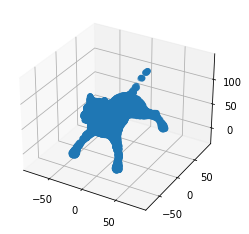

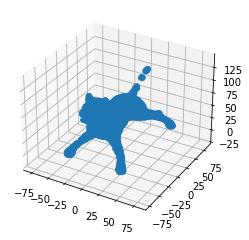

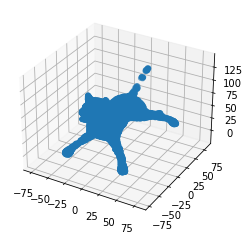

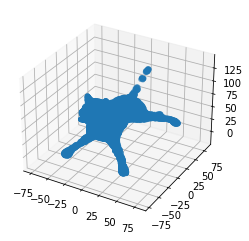

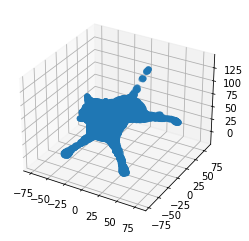

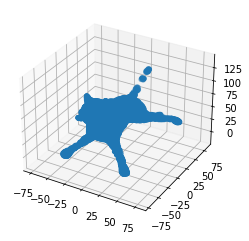

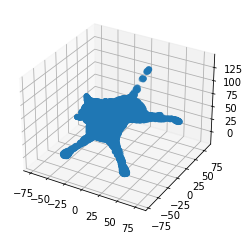

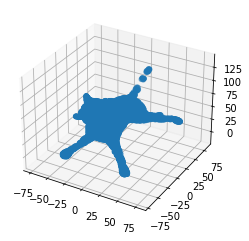

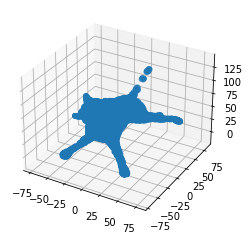

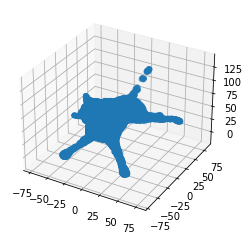

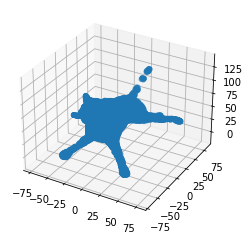

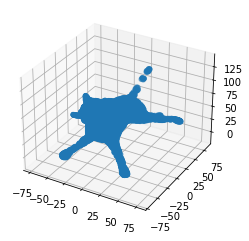

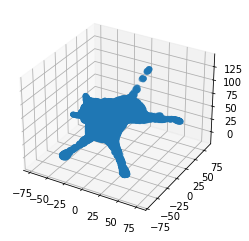

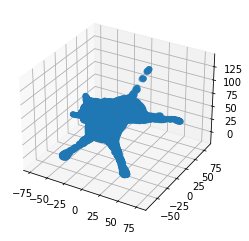

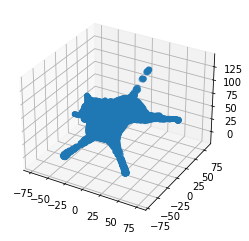

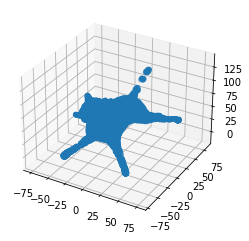

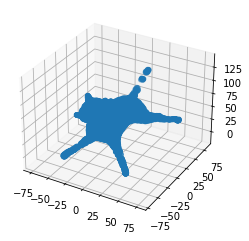

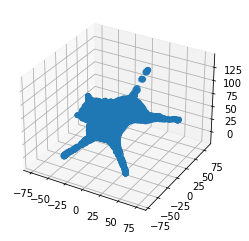

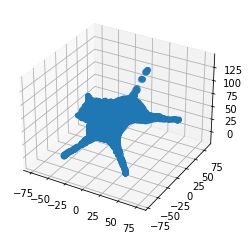

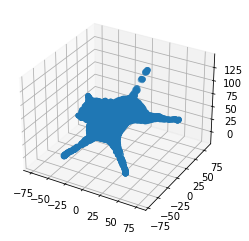

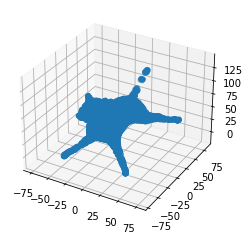

In [6]:
from implicit_function_numpy import DifferentiableMDS

diff_mds = DifferentiableMDS(mds, x0, phi, d_mat)
xn = diff_mds.forward()

In [7]:
loss = sum(xn) ** 2
loss.backward()


Backward
(tensor([[328792.1875, 328792.1875, 328792.1875],
        [328792.1875, 328792.1875, 328792.1875],
        [328792.1875, 328792.1875, 328792.1875],
        ...,
        [328792.1875, 328792.1875, 328792.1875],
        [328792.1875, 328792.1875, 328792.1875],
        [328792.1875, 328792.1875, 328792.1875]], dtype=torch.float64),)
